In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("../data/weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [26]:
data["Gender"].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

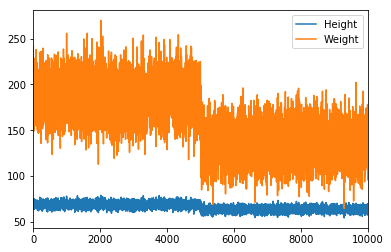

In [6]:
data.plot()

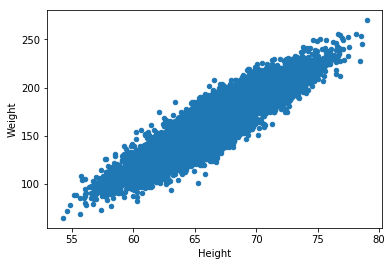

In [9]:
data.plot(kind="scatter", x="Height", y="Weight")

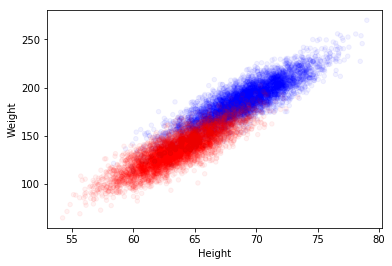

In [27]:
cmap = {'Male': 'blue', 'Female': 'red'}

data.plot(kind="scatter", x="Height", y="Weight", c=[cmap[i] for i in data.Gender], alpha=0.05)

In [29]:
def generateColor(gender):
    if gender == "Male":
        return "Blue"
    else:
        return "red"

exdata = data.copy()
colors = exdata.apply(lambda row: generateColor(row.Gender), axis = 1)
exdata["Color"] = colorscolors

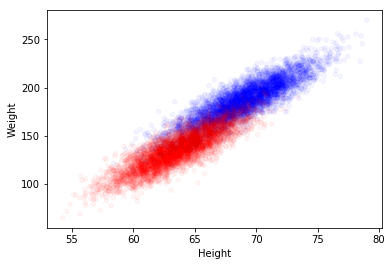

In [31]:
exdata.plot(kind="scatter", x="Height", y="Weight", c=exdata["Color"], alpha="0.04")

Another way

In [48]:
males = data[data["Gender"] == "Male"]
females = data.query('Gender == "Female"')

In [49]:
males.shape

(5000, 3)

In [50]:
females.shape

(5000, 3)

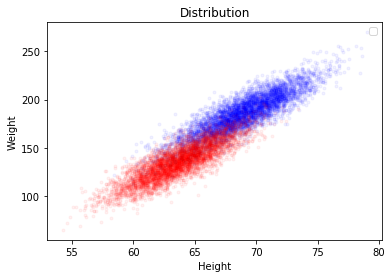

In [70]:
fig, ax = plt.subplots()
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Distribution")
ax.legend(["Males", "Females"])
ax.plot(males["Height"], males["Weight"], ".b", females["Height"], females["Weight"], ".r", alpha=0.05)

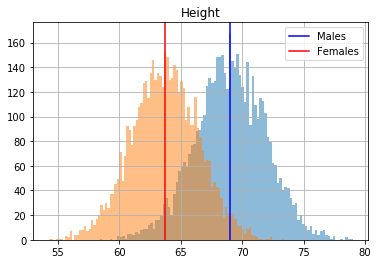

In [83]:
fig, ax = plt.subplots()

males.hist(column = "Height", ax = ax, bins = 100, alpha=0.5)
plt.axvline(males["Height"].mean(), color="blue")
females.hist(column = "Height", ax = ax, bins = 100, alpha=0.5)
plt.axvline(females["Height"].mean(), color="red")
plt.legend(["Males", "Females"])

In [89]:
pvt = data.pivot(columns="Gender", values="Weight")

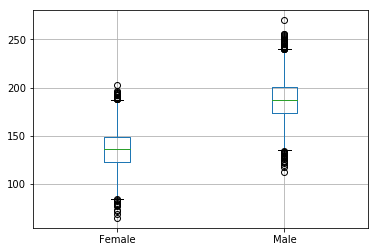

In [90]:
pvt.boxplot()